In [1]:
import os 
import pandas as pd
import src.source as sr
import seaborn as sns
import matplotlib.pyplot as plt
import re

españa = pd.read_csv('input/españa.csv',encoding='latin-1')
terrorism= pd.read_csv('input/terrorism.csv',encoding='latin-1')


# ATAQUES TERRORISTAS EN ESPAÑA

## **¿Un poco de contexto?**

El terrorismo es una herramienta que se ha utilizado para imponer por la fuerza un determinado proyecto político/religioso, infundiendo miedo al oponente.

Concretamente, el terrorismo marcó la historia de España desde los años 60.

Podemos encontrar grupos de diferentes ideologías como nacionalistas radicales, extrema izquierda, yihadistas o ultraderecha.

Así, se va a analizar en un primer momento la evolución de los ataques terroristas desde 1970 hasta la actualidad.

Antes de comenzar, se debe dividir la hitoria en tres fases políticas: La dictadura franquista (hasta 1975), la transición a la democracia y el proceso democrático posterior a 1982.



## ¿Cómo?

Mediante gráficas se verá mucho mejor y compararemos la historia del terrorismo en España con la evolución en el mundo entero.

Text(0.5, 1.0, 'Attacks/year in SPAIN')

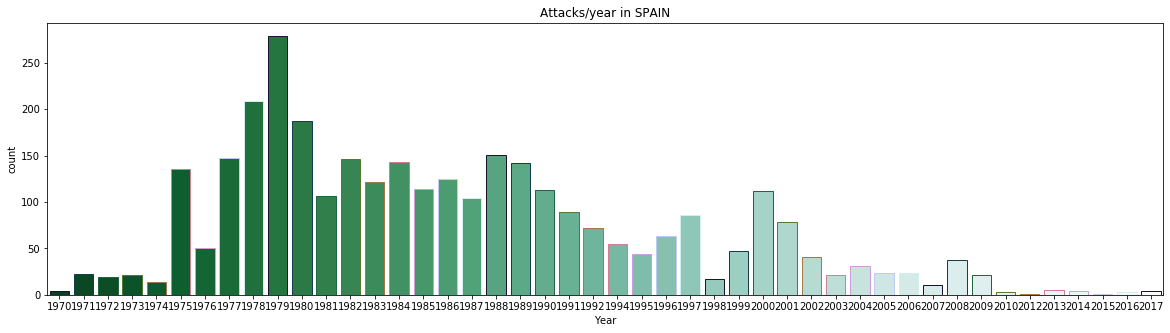

In [2]:
plt.subplots(figsize=(20,5))
sns.countplot('Year',data=españa,palette="BuGn_r",edgecolor=sns.color_palette('cubehelix',9))
plt.title('Attacks/year in SPAIN')


**Quizas se vea mejor la evolución mediante esta otra gráfica:**

Text(0.5, 1.0, 'Nº Attacks each year SPAIN')

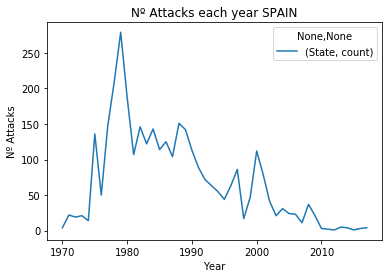

In [3]:
df_3=españa.groupby("Year").agg({"State":["count"]})
df_3.plot.line()
plt.ylabel('Nº Attacks')
plt.title("Nº Attacks each year SPAIN")

Se puede observar como los ataques terroristas tuvieron su auge al final de la dictadura y principio de la transición. 

Efectivamente, en los años 60 y 70, con el descontento de la falta de libertades, surgieron algunos grupos extremistas.
Aunque una vez fracasado el golpe de estado del 81 y consolidada la democracia, se esperaba la casi eliminación del terrorismo. Pero este no fue asi. De hecho, no fue hasta el año 2018, que el grupo terrorista ETA informó de su total disolución.

Si seguimos la gráfica por el tiempo, observamos un pico en la decáda de los 2000, que se debe sobre todo al 11-M del 2004, en el que España se vio sumido en la tragedia por un ataque terrorista en la capital, el cual, segun investigaciones, apuntan a una célula de un grupo yihadista. En este ataque fallecieron 193 personas.

-------

**Hagamos una comparación**

Se compara la actividad a lo largo del tiempo de los ataques terroristas en España con la del resto del mundo


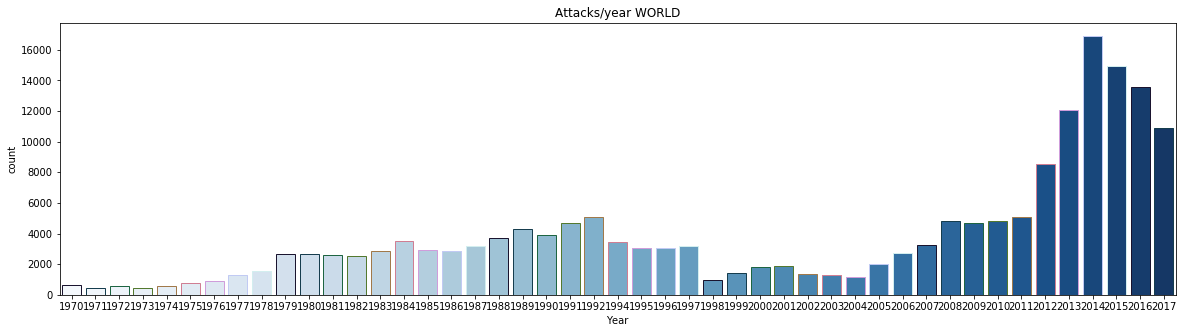

Text(0.5, 1.0, 'Nº Attacks each year WORLD')

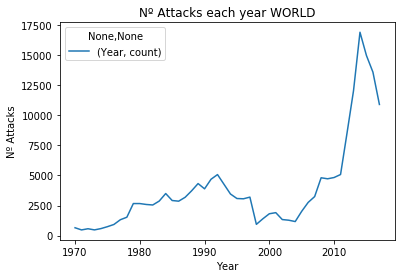

In [5]:
plt.subplots(figsize=(20,5))
sns.countplot('Year',data=terrorism,palette="Blues",edgecolor=sns.color_palette('cubehelix',9))
plt.title('Attacks/year WORLD')
plt.show()

df_4=terrorism.groupby("Year").agg({"Year":["count"]})
df_4.plot.line()
plt.ylabel('Nº Attacks')
plt.title("Nº Attacks each year WORLD")

Se puede observar como la gráfica es practicamente la contraria.
Sobre todo, por ataques yihadistas o Talibanes.

In [11]:
terr_group5=sr.top5(terrorism,"Terr_group")
terr_group5.Terr_group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
Name: Terr_group, dtype: int64

----

**Continuamos con España**

Antes de la muerte de Franco, como se verá en la siguiente gráfica, surgieron los *GRAPO* (ultraizquierdista) y *ETA* (nacionalista vasco radical).

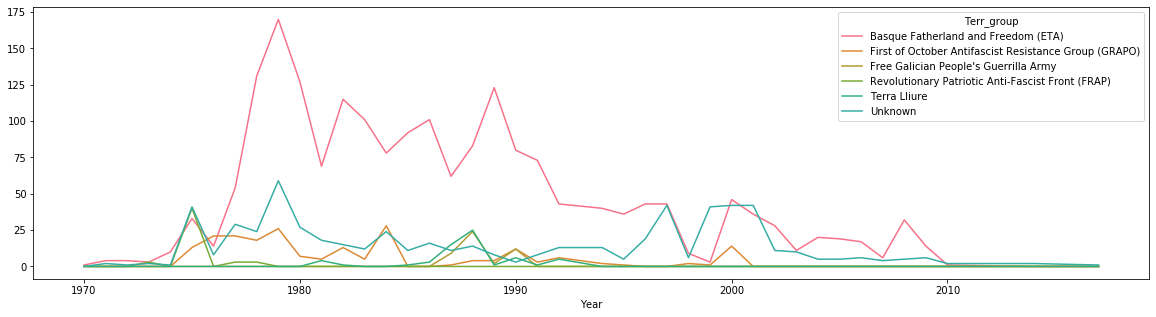

In [12]:
grupos5= españa[españa['Terr_group'].isin(españa['Terr_group'].value_counts()[0:6].index)]
pd.crosstab(grupos5.Year,grupos5.Terr_group).plot(color=sns.color_palette('husl',10))
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.show()

Observamos cómo el principal grupo, y el que aterrorizó a España durante años fue el grupo terrorista *ETA*. Y, anque observamos en entre los 6 primero a otros grupos como *Terra Lliure* en cataluña, o los *Grapo*, se observa la principal relevancia de *ETA* en los años anteriormente comentados.

-----

**Tipo de ataque segun la región**

En la siguiente gráfica podemos observar qué tipo de ataque predomina en cada región.

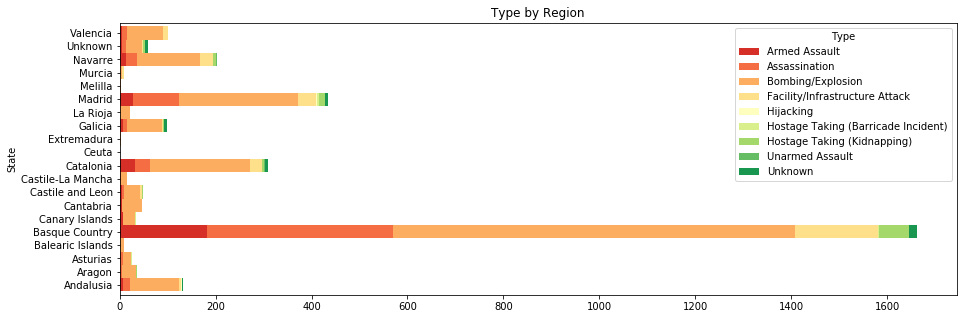

In [14]:
pd.crosstab(españa.State,españa.Type).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.title("Attack type by Region")
plt.show()

Se observa cómo la region predominante es el Pais Vasco con el tipo de ataque sobre todo con bombas o secuestro.

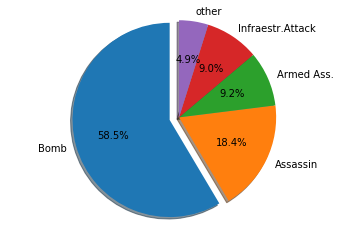

In [15]:
labels = 'Bomb', 'Assassin', 'Armed Ass.','Infraestr.Attack','other'
sizes = [1902, 599, 298, 292,158]
explode = (0.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## CONCLUSIÓN

Como se ha podido comprobar, efectivamente, el grupo terrorista predominante en España fue el grupo terrorista ETA. 
Este grupo, podemos observar, que sus ataques solían ser ataques con bombas o secuestros.

El primer ataque fue en 1968 a José Perdinés Arcay, agente de la Guardia Civil en Guipuzcua.
El último el 30 de diciembre de 2006 en la T4 de Barajas.
En total, se han llevado 814 víctimas mortales en su historia como grupo terrorista según este dataset aunque oficialmente se registran 873.